In [0]:
import numpy as np
import pandas as pd

In [2]:
!pip install missingno
!pip install pivottablejs
!pip install pandas_profiling
!pip install ipywidgets 

  Running setup.py bdist_wheel for missingno ... - done
  Stored in directory: /content/.cache/pip/wheels/92/46/9a/a8f3e9ad98ee4a53242e5ec371309dd71bd1177eb95c72788f
Successfully built missingno
    100% |████████████████████████████████| 112kB 3.3MB/s 
    100% |████████████████████████████████| 2.2MB 537kB/s 


  Running setup.py bdist_wheel for pandocfilters ... - done
  Stored in directory: /content/.cache/pip/wheels/08/5b/5b/66b3cde6f8215f8345479ef3699d6ddbb860f6ea7072008f8b
Successfully built pandocfilters
  Found existing installation: pandocfilters 1.3.0
    Uninstalling pandocfilters-1.3.0:
      Successfully uninstalled pandocfilters-1.3.0


In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import plotly.plotly as py
from plotly.graph_objs import *
from matplotlib.pyplot import GridSpec
from pandas.tools.plotting import scatter_matrix
from sklearn.datasets import make_blobs
import missingno as msno
import pivottablejs
import pandas_profiling
import logging

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

/usr/local/lib/python3.6/dist-packages/pandas_profiling/plot.py:15: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist-packa

In [4]:
#@title Default title text
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))    

##Dataset Description ¶
Source: https://www.kaggle.com/giantuji/UjiIndoorLoc

WAP001-WAP520: Intensity value for Wireless Access Point (WAP). WAP will be the acronym used for rest of this notebook. Negative integer values from -104 to 0 and +100. Censored data: Positive value 100 used if WAP was not detected.

Longitude: Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000

Latitude: Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.

Floor: Altitude in floors inside the building. Integer values from 0 to 4.

BuildingID: ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.

SpaceID: Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.

RelativePosition: Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.

UserID: User identifier (see below). Categorical integer values.

PhoneID: Android device identifier (see below). Categorical integer values.

Timestamp: UNIX Time when the capture was taken. Integer value.

In [7]:
trainingData= pd.read_csv("trainingData.csv")
trainingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [0]:
Describe=trainingData.describe()

In [9]:
Describe=Describe.iloc[:,:520]
Describe

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.0
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,84.974921,99.866881,98.881276,98.833325,99.436525,73.705673,59.889803,99.788634,99.970507,100.0
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,50.099899,5.023663,14.206023,14.634613,10.259137,62.278292,74.060259,6.360671,2.404232,0.0
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,100.0
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [0]:
Describe1=Describe.iloc[3:4,:520]

In [11]:
testingData = pd.read_csv("validationData.csv")
testingData.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774


In [12]:
testingData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,1111.000000,1111.0,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1111.000000,1111.000000,...,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.0,1111.0,1111.0,1111.000000,1.111000e+03
mean,98.627363,100.0,99.665167,99.665167,100.0,100.0,100.0,94.297030,90.655266,98.811881,...,99.843384,-7529.197448,4.864902e+06,1.571557,0.758776,0.0,0.0,0.0,11.923492,1.380604e+09
std,16.127245,0.0,7.888265,7.888607,0.0,0.0,0.0,32.148809,39.886991,14.931667,...,5.220261,120.209336,7.027280e+01,1.001828,0.816139,0.0,0.0,0.0,6.556236,5.003222e+05
min,-94.000000,100.0,-87.000000,-88.000000,100.0,100.0,100.0,-99.000000,-96.000000,-98.000000,...,-74.000000,-7695.938755,4.864748e+06,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.379578e+09
25%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7637.423800,4.864843e+06,1.000000,0.000000,0.0,0.0,0.0,9.000000,1.380189e+09
50%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7560.376300,4.864915e+06,1.000000,1.000000,0.0,0.0,0.0,13.000000,1.380873e+09
75%,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7420.539659,4.864967e+06,2.000000,1.000000,0.0,0.0,0.0,15.000000,1.380875e+09
max,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,...,100.000000,-7299.786517,4.865017e+06,4.000000,2.000000,0.0,0.0,0.0,21.000000,1.381248e+09


In [13]:
trainingData['USERID'].value_counts()

11    4516
1     2737
14    1596
7     1383
2     1091
9     1066
16    1032
6      980
10     913
13     841
17     724
5      610
8      507
15     498
18     440
12     437
4      374
3      192
Name: USERID, dtype: int64

In [0]:
df = trainingData.copy()

In [15]:
trainingData.shape

(19937, 529)

In [0]:
X_train = trainingData.iloc[:,:520]
X_test = testingData.iloc[:,:520]

y_train = trainingData.iloc[:,520:526]
y_test = testingData.iloc[:,520:526]

In [17]:
X_train.shape

(19937, 520)

In [18]:

# Response variables in our problem are Building, Floor, Latitude, Longitude and Relative Position
(trainingData[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


In [19]:
(trainingData
.astype(str)
.describe(include=['object']))

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937,19937,19937,19937,19937,19937,19937,19937,19937,19937,...,19937,19937,19937,19937,19937,19937,19937,19937,19937,19937
unique,6,3,1,1,10,36,52,39,48,12,...,1,679,687,5,3,123,2,18,16,9965
top,100,100,100,100,100,100,100,100,100,100,...,100,-7367.458799999206,4864841.782799996,3,2,202,2,11,14,1371715291
freq,19919,19918,19937,19937,19897,19629,19359,19260,19342,19850,...,19937,135,135,5048,9492,484,16608,4516,4835,18


For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

In [20]:
np.nanmin(Describe.iloc[3:4,:520].values)

-104.0

In [21]:
np.nanmax(Describe.iloc[3:4,:520].values)

100.0

In [0]:
# Replaced all WAP values having 100 to NAN

X_train = (X_train
             .replace(to_replace=100,value=np.nan))

# Perform the same transform on Test data
X_test = (X_test
             .replace(to_replace=100,value=np.nan))

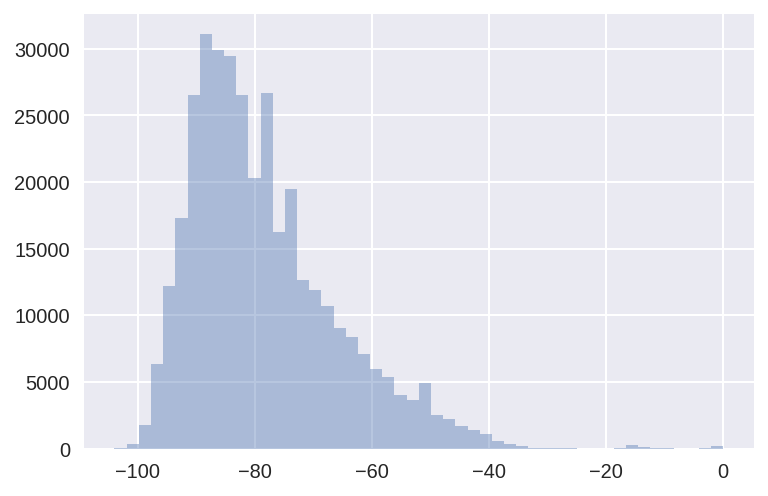

In [23]:
# Replacing out-of-range values with NaN to avoid disturbance to our analysis on in-range RSSI distribution
X_stack = X_train.stack(dropna=False)
sns.distplot(X_stack.dropna(),kde = False)


Skewness is a measure of asymmetry of distribution. Clearly, the distribution above appears right-skewed with majority of the values being on the left side of the distribution. Let's look at the skewness value for inidividual WAP RSSI distributions! We might have to perform a log/ Box-Cox transformation to overcome the skewness.

Let's look at percentage of out-of-range overall and column wise.

In [24]:
sum(X_stack.notnull())

358763

In [25]:
len(X_stack) # Stack is changing into 2D-Array  520col * 19937rows

10367240

In [26]:
# Proportion of in range values
sum(X_stack.notnull())/len(X_stack)

0.03460544947353394

96.1% of the values in the matrix represent Out-of-Range. This is expected as for any given measurement, only a subset of the APs might be in reach of the mobile device.

For this purpose, let's analyze the ditribution of number of APs in range for the training data samples.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning:

remove_na is deprecated and is a private function. Do not use.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(0.5,0,'Number of APs in range')

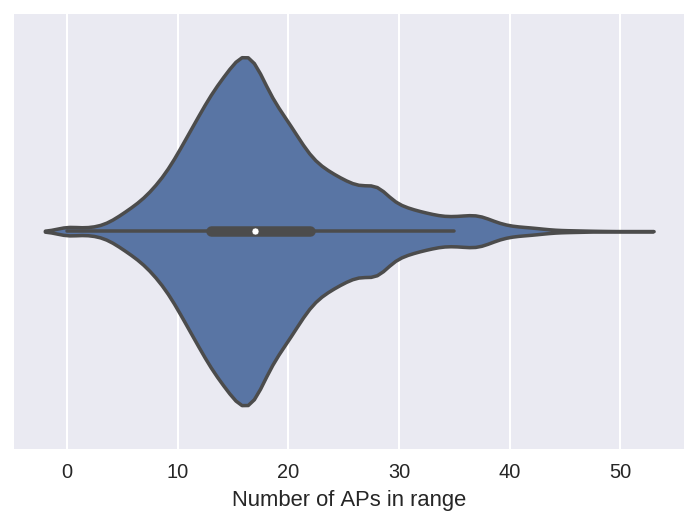

In [27]:
waps_in_range = (X_train
                 .notnull()
                 .sum(axis = 1))

fig, ax = plt.subplots(1,1)

sns.violinplot(waps_in_range, ax = ax)
ax.set_xlabel("Number of APs in range")

In [28]:
waps_in_range.describe()

count    19937.000000
mean        17.994834
std          7.333575
min          0.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         51.000000
dtype: float64

Interestingly, majority of the samples have over 13 APs in range with the maximum of 51 APs. We do observe some of the training samples with 0 APs in range. Let's remove these samples from the training data.

In [29]:
print("Before sample removal:", len(X_train))

y_train = (y_train
          .loc[X_train
              .notnull()
              .any(axis=1),:])

X_train = (X_train
           .loc[X_train
                .notnull()
                .any(axis=1),:])


print("After sample removal:", len(X_train))

Before sample removal: 19937
After sample removal: 19861


We cannot delete training samples with just a single AP or few APs in range as that is the best information we have to localize.

We can remove the RSSI columns related to APs which are not in range in any of our training samples.

In [30]:
# Removing columns with all NaN values
all_nan = (X_train
           .isnull()
           .all(axis=0) == False)
filtered_cols = (all_nan[all_nan]
                 .index
                 .values)

print("Before removing predictors with no in-range values", X_train.shape)

X_train = X_train.loc[:,filtered_cols]
X_test = X_test.loc[:,filtered_cols]

print("After removing predictors with no in-range values", X_train.shape)

Before removing predictors with no in-range values (19861, 520)
After removing predictors with no in-range values (19861, 465)


In [31]:
X_raw_train = X_train
X_raw_test = X_test

X_raw_train.shape, X_raw_test.shape

((19861, 465), (1111, 465))

#Skewness and Kurtosis 

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

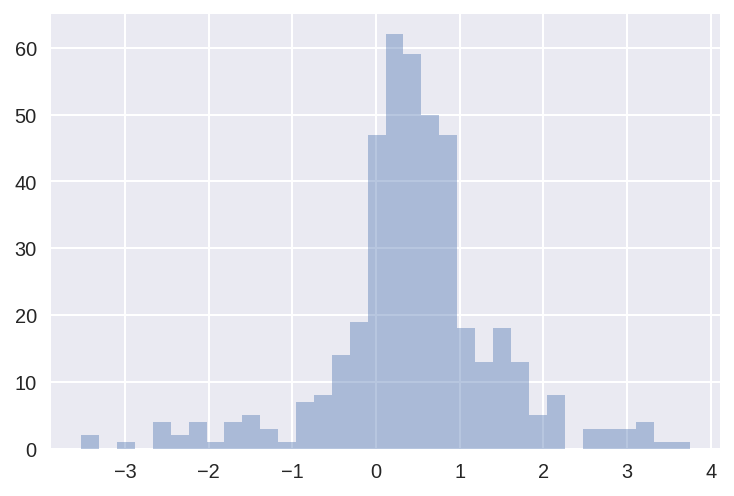

In [32]:
# Finding skewness ignoring out-of-range values
X_skew = X_train.skew()

sns.distplot(X_skew.dropna(),kde=False)

In [33]:
X_exp_train = np.power(10,X_train/10,) 
X_exp_test = np.power(10,X_test/10)

abs_min = (X_exp_train.apply(min).min())
print(abs_min)

X_exp_train.fillna(abs_min,inplace=True)# Change all values to abs_min
X_exp_test.fillna(abs_min,inplace=True)

5.011872336272715e-11


As you can see above majority of the WAP columns have a low to medium positive skewness in the region (0,1). There are still a few columns outside the (1,-1) range. (1,-1) is considered an acceptable range of skewness.

Next, before we apply the Normality tests, we need to fill in the out-of-range values which are currently NaN. Box-Cox transformation requires all values to be positive. For this purpose, let's transform our predictors to normal scale from the dBm scale.

Also, the out-of-range values are transformed to 1/hundreth of the absolute minimum among all in-range values. Therefore, the transformed out-of-range value represents the minimum RSSI value in the dataset.

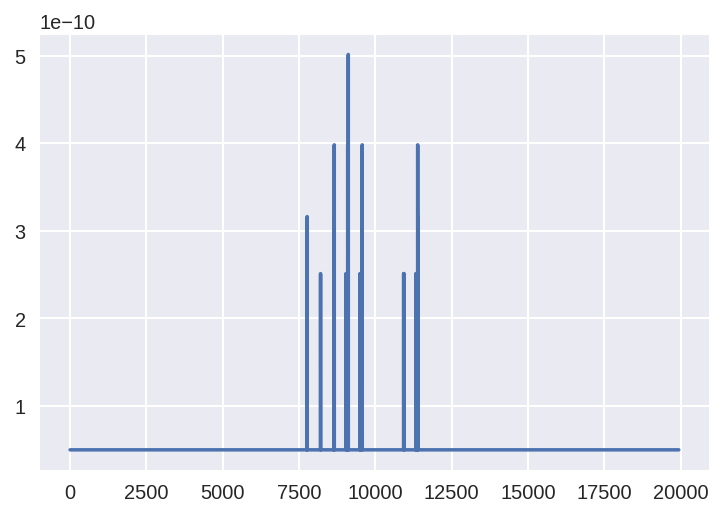

In [34]:
plt.plot(X_exp_train.iloc[:,0])

#Normality test
In this sub-section, I will explore various normality tests and explore the distributions of RSSI predictors.

Skew test: Tests whether the skew is different from the normal distribution. The Z-score of the test in which the null hypothesis states that that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.

Kurtosis test: Z-score of the test in which the null hypothesis states that the kurtosis of the population from which the sample was drawn is that of the normal distribution: kurtosis = 3(n-1)/(n+1).

k2: $s^2 + k^2$, where $s$ is the z-score returned by skew test and $k$ is the z-score returned by kurtosistest.

p_value: A 2-sided chi squared probability for the hypothesis test that the sample comes from a normal distribution. Same test as k2.

In [0]:
from scipy.stats.mstats import  skew, kurtosis

def skew_score(s):
    s = s.dropna()
    return float(skew(s).data) #Return unbiased skew over requested axis Normalized by N-1

def kurtosis_score(s):
    s = s.dropna()
    return kurtosis(s) #Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1

def in_range(s):
    return (s > abs_min).sum() # Samples that are greater then abs.min() i.e. 5.011

In [36]:
X_norm = pd.DataFrame({'Sample_Size': X_exp_train.apply(in_range),
                         'Skewness': X_exp_train.apply(skew_score),
                         'Kurtosis': X_exp_train.apply(kurtosis_score),
                     
                        })

X_norm.head(15)

,Kurtosis,Sample_Size,Skewness
WAP001,1589.911556,18,38.296999
WAP002,1570.412878,19,38.774718
WAP005,988.020774,40,29.692772
WAP006,2649.644164,308,49.203758
WAP007,2544.345308,578,48.199343
WAP008,271.572833,677,15.905379
WAP009,1607.562517,595,36.943490
WAP010,1314.161272,87,33.682378
WAP011,8749.417194,2956,91.377383
WAP012,2186.418420,2983,46.709112


In [37]:
(X_exp_train.iloc[:,0] > 0.0).sum()

19861

Let's explore the relationship between Kurtosis scores and Skew scores.

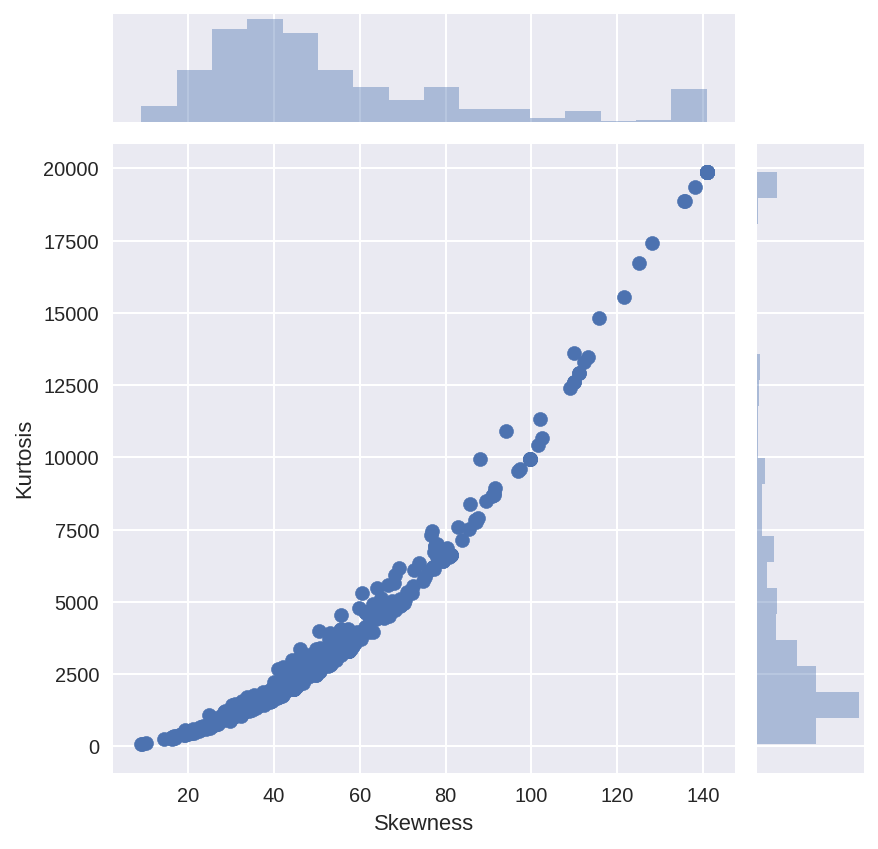

In [38]:
sns.jointplot(y="Kurtosis", x="Skewness", stat_func= None, data=X_norm)

Skewness: For normally distributed data, the skewness should be about 0. Skewness value > 0 means that there is more weight in the right tail of the distribution. Similarly, a negative value indicates a left-skewed distribution with more weight on the left tail.

Clearly, many of the predictors have a skewness outside the expected range of 0,0

Kurtosis: Kurtosis is the fourth central moment divided by the square of the variance. If a distribution has positive kurtosis, that means it has more in the tails than the normal distribution. Similarly, if a distribution has a negative kurtosis, it has less in the tails than the normal distribution.

In the above figure, for the columns with a higher skewness score, the kurtosis is also more extreme.

The statistical significance of the Skewness and Kurtosis scores can be checked plotting the z-scores of the Skew test and Kurtosis tests.

# Box-Cox Transformation

Data that doesn't follow a known distribution, such as the normal distribution, is often difficult to manage. A popular strategy to get control of the data is to apply the Box-Cox transformation.
The transformation relies primarily on a lambda (ƛ) variable that holds a value between -1 and 1 that is automatically calculated to be optimal for your data. 


A Box-Cox normality plot shows graphically what the best transformation parameter is to use in boxcox to obtain a distribution that is close to normal. Probability Plot Correlelation Coefficient, as obtained from probplot when fitting the Box-Cox transformed input x against a normal distribution.

In [0]:
from scipy import stats

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3103: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:901: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1849: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1850: RuntimeWarning:

invalid value encountered in double_scalars



Text(-8,0.1,'$\\lambda_{opt} = $5.636369066885444')

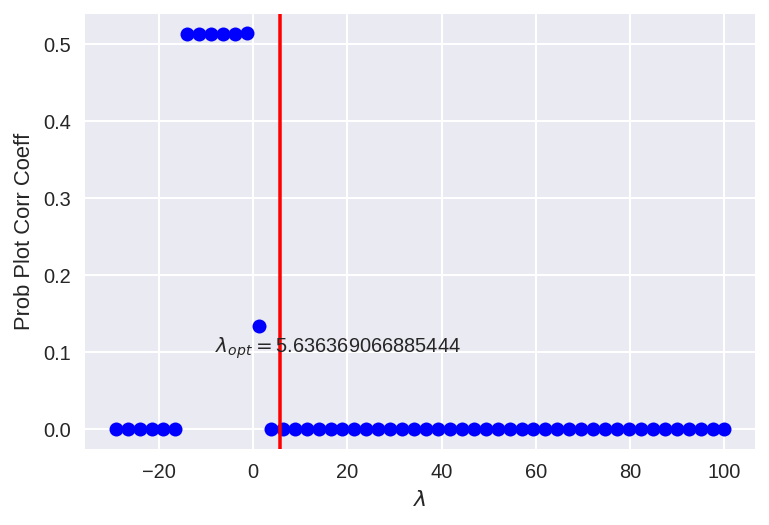

In [40]:
# Transforming boxcox plot to normalized form and here -100 and 100 are the ranges, lower and upper bound
lmbdas, pppc = stats.boxcox_normplot(X_exp_train.iloc[:,100], -100, 100)

fig,ax = plt.subplots(1,1)
ax.plot(lmbdas,pppc,'bo')

_, maxlog = stats.boxcox(X_exp_train.iloc[:,0])
ax.axvline(maxlog, color='r') # added vertical line across the axes

ax.set_xlabel("$\lambda$")
ax.set_ylabel("Prob Plot Corr Coeff")
ax.text(x = -8, y = 0.1, s="$\lambda_{opt} = $" + str(maxlog))

The maximum log likelihood function peaks at $\lambda = 1.1437$. Next, let's find out the $\lambda$s for different columns in our dataset.

In [0]:
def box_cox_lambda(s):
    _, maxlog = stats.boxcox(s)
    return maxlog

stats.boxcox(x, lmbda=None, alpha=None). Returns a positive dataset transformed

In [42]:
lambda_bc = X_exp_train.apply(box_cox_lambda)

X_boxcox_train = X_exp_train
X_boxcox_test = X_exp_test

for wap in X_boxcox_train:
    # Training data transform
    X_boxcox_train.loc[:,wap] = stats.boxcox(X_exp_train.loc[:,wap],lmbda = lambda_bc.loc[wap])
    # Test data transform
    X_boxcox_test.loc[:,wap] = stats.boxcox(X_exp_test.loc[:,wap],lmbda = lambda_bc.loc[wap])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:901: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1849: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1850: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:901: RuntimeWarning:

overflow encountered in square



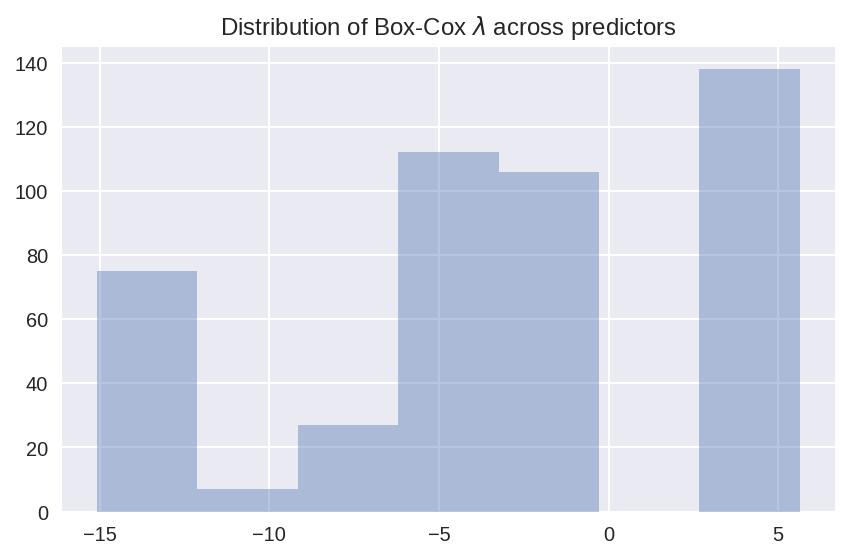

In [43]:
sns.distplot(lambda_bc, kde = False)
plt.title("Distribution of Box-Cox $\lambda$ across predictors")
plt.tight_layout()

The above figure shows the distribution of $\lambda$s that maximize log-likelihood function for each predictor. We can observe the two biggestbars are located at +5 and -2.5.

In [44]:
# Calculating skewness, kurtosis and BoxCox_lambda 
X_norm_post_boxcox = pd.DataFrame({'Skewness': X_boxcox_train.apply(skew_score),
                         'Kurtosis': X_boxcox_train.apply(kurtosis_score),
                         'BoxCox_Lambda': lambda_bc})

X_norm_post_boxcox.head(10)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:70: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:4208: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:70: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:6649: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:32: RuntimeWarning:

overflow encountered in reduce



,BoxCox_Lambda,Kurtosis,Skewness
WAP001,5.636369,-3,0.000000
WAP002,5.636369,-3,0.000000
WAP005,5.636369,-3,0.000000
WAP006,-15.078885,--,0.000000
WAP007,-6.989974,29.3916,5.602818
WAP008,-6.063101,24.3721,5.135374
WAP009,-5.750808,28.4107,5.514591
WAP010,5.636369,-3,0.000000
WAP011,-0.975030,1.93886,1.982143
WAP012,-0.968725,1.87163,1.965486


From the above table, we observed that the BoxCox-parameter values lie between -2.5 to +5. Also,The kurtosis and skewness seems to have greatly reduced compared to before the Box-Cox transformation



/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: UserWarning:




Text(0.5,1,'Post- Box-Cox')

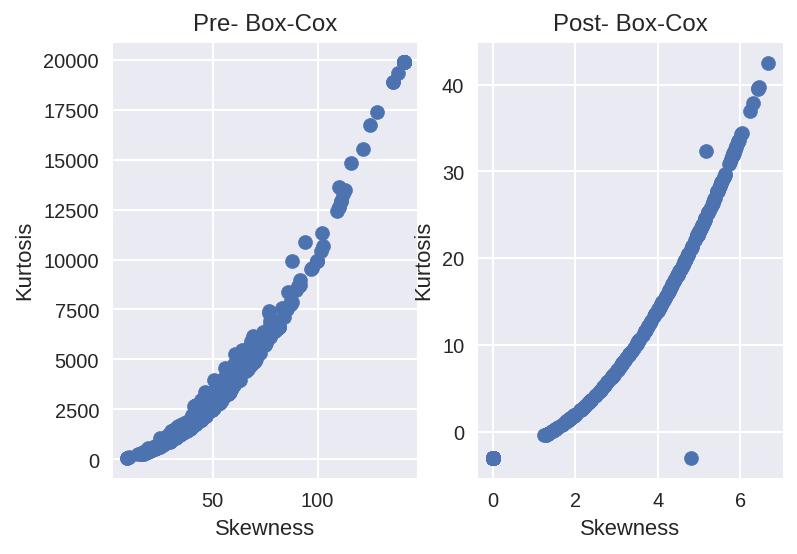

In [45]:

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(y="Kurtosis", x="Skewness", data=X_norm)
ax1.set_xlabel("Skewness")
ax1.set_ylabel("Kurtosis")
ax1.set_title("Pre- Box-Cox")

ax2.scatter(y="Kurtosis", x="Skewness", data=X_norm_post_boxcox)
ax2.set_xlabel("Skewness")
ax2.set_ylabel("Kurtosis")
ax2.set_title("Post- Box-Cox")

From the above two, we found that the distribution is normalized which reduced the skewness as well as Kurtosis.


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:544: UserWarning:




ValueError: ignored

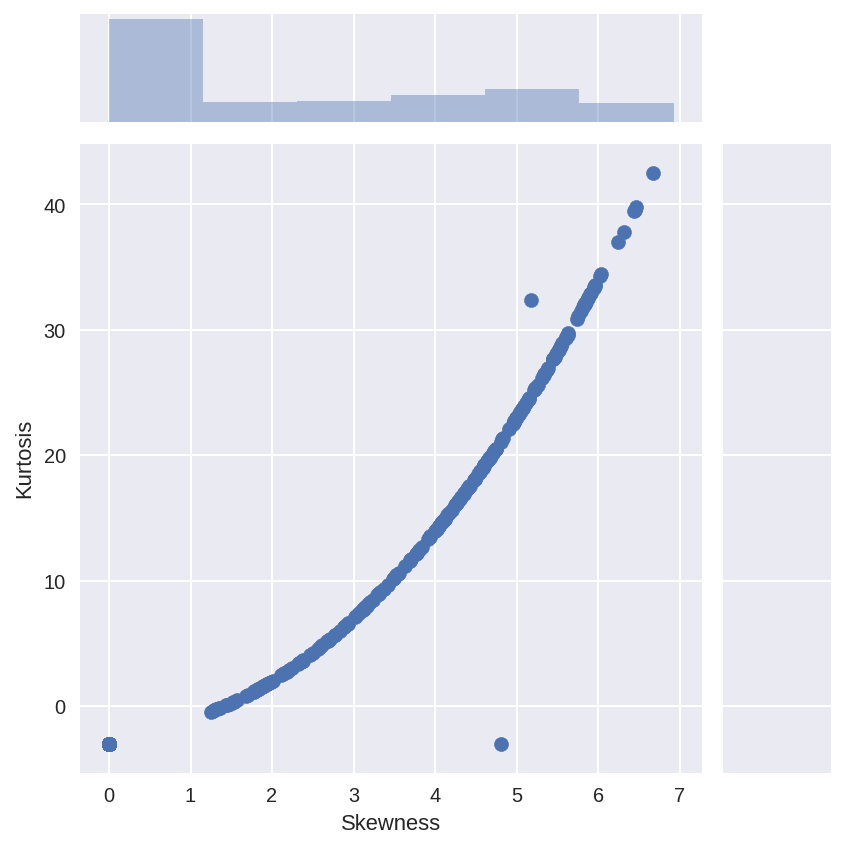

In [47]:
sns.jointplot(y="Kurtosis", x="Skewness", stat_func = None, data=X_norm_post_boxcox)

We can observe the biggest bars are located in the region [0,1) for skewness and [0,-3) for kurtosis.

At this point, we can remove the predictors that have high skewness (> 3) or high kurtosis (> 1). However, as predictor corresponds to RSSI distribution of a single WAP, there might be samples for which one or more of these WAPs might be the closest and correspondingly have the highest measure. For this purpose, I do not perform any predictor selection at this stage.

Instead, we can explore how much of the variance in the dataset is explained by the predictors using Principal Component Analysis (PCA).

# Dimensionality Reduction <a id = "dimension-reduction"></a>
Dimensionality reduction is one of the key techniques to reduce the complexity.

PCA is a simple dimensionality reduction technique that applies linear transformations on the original space. Among all the orthogonal linear projections, PCA minimizes the reconstruction error, which is the distance between the instance and its reconstruction from the lower-dimensional space. That is sum of the distances between points in original space and the corresponding points in lower-dimensional space.

Before we can perform the PCA analysis, we need to bring the predictors to the same scale. Then, we analyze the correlations between the predictors and remove highly correlated predictors. This is because adjoining nearly correlated variables increases the contribution of their common underlying factor to the PCA. We can remove highly correlated predictors algorithmically or removing the correlations by whitening the data (conversion to Identity Covariance Matrix).

In [48]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std_train = sc.fit_transform(X_boxcox_train)
X_std_test = sc.transform(X_boxcox_test)

X_std_train = pd.DataFrame(X_std_train)
X_std_test = pd.DataFrame(X_std_test)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:117: RuntimeWarning:

overflow encountered in reduce



In [49]:
X_std_train.shape, X_std_test.shape

((19861, 465), (1111, 465))

In [46]:

X_std_train.shape, X_std_test.shape

((19861, 465), (1111, 465))

In [51]:
all_zero= ((X_std_train == 0) 
           .all()==False)

all_zero[all_zero].index.values

array([  4,   5,   6,   8,   9,  10,  11,  12,  13,  16,  17,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  70,  71,  72,  73,  74,  75,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147,
       148, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 180, 181, 192, 193, 209, 210, 211, 212, 223, 224,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 242, 24

In [52]:
# The no. of columns having zero values
(X_std_train == 0).all().sum()

211

In [53]:
#After the Box-Cox transformation and scaling, few of the predictors are reduced to a constant value of 0
# Let's remove these predictors from the training and test data
all_zero= ((X_std_train == 0) 
           .all()==False)
filtered_cols = (all_zero[all_zero]
                 .index
                 .values)

print("Before removing predictors with only zeros", X_std_train.shape)

X_rm_train = X_std_train.loc[:,filtered_cols]
X_rm_test = X_std_test.loc[:,filtered_cols]

print("After removing predictors with only zeros", X_rm_train.shape)

Before removing predictors with only zeros (19861, 465)
After removing predictors with only zeros (19861, 254)


# Predictor Correlations 

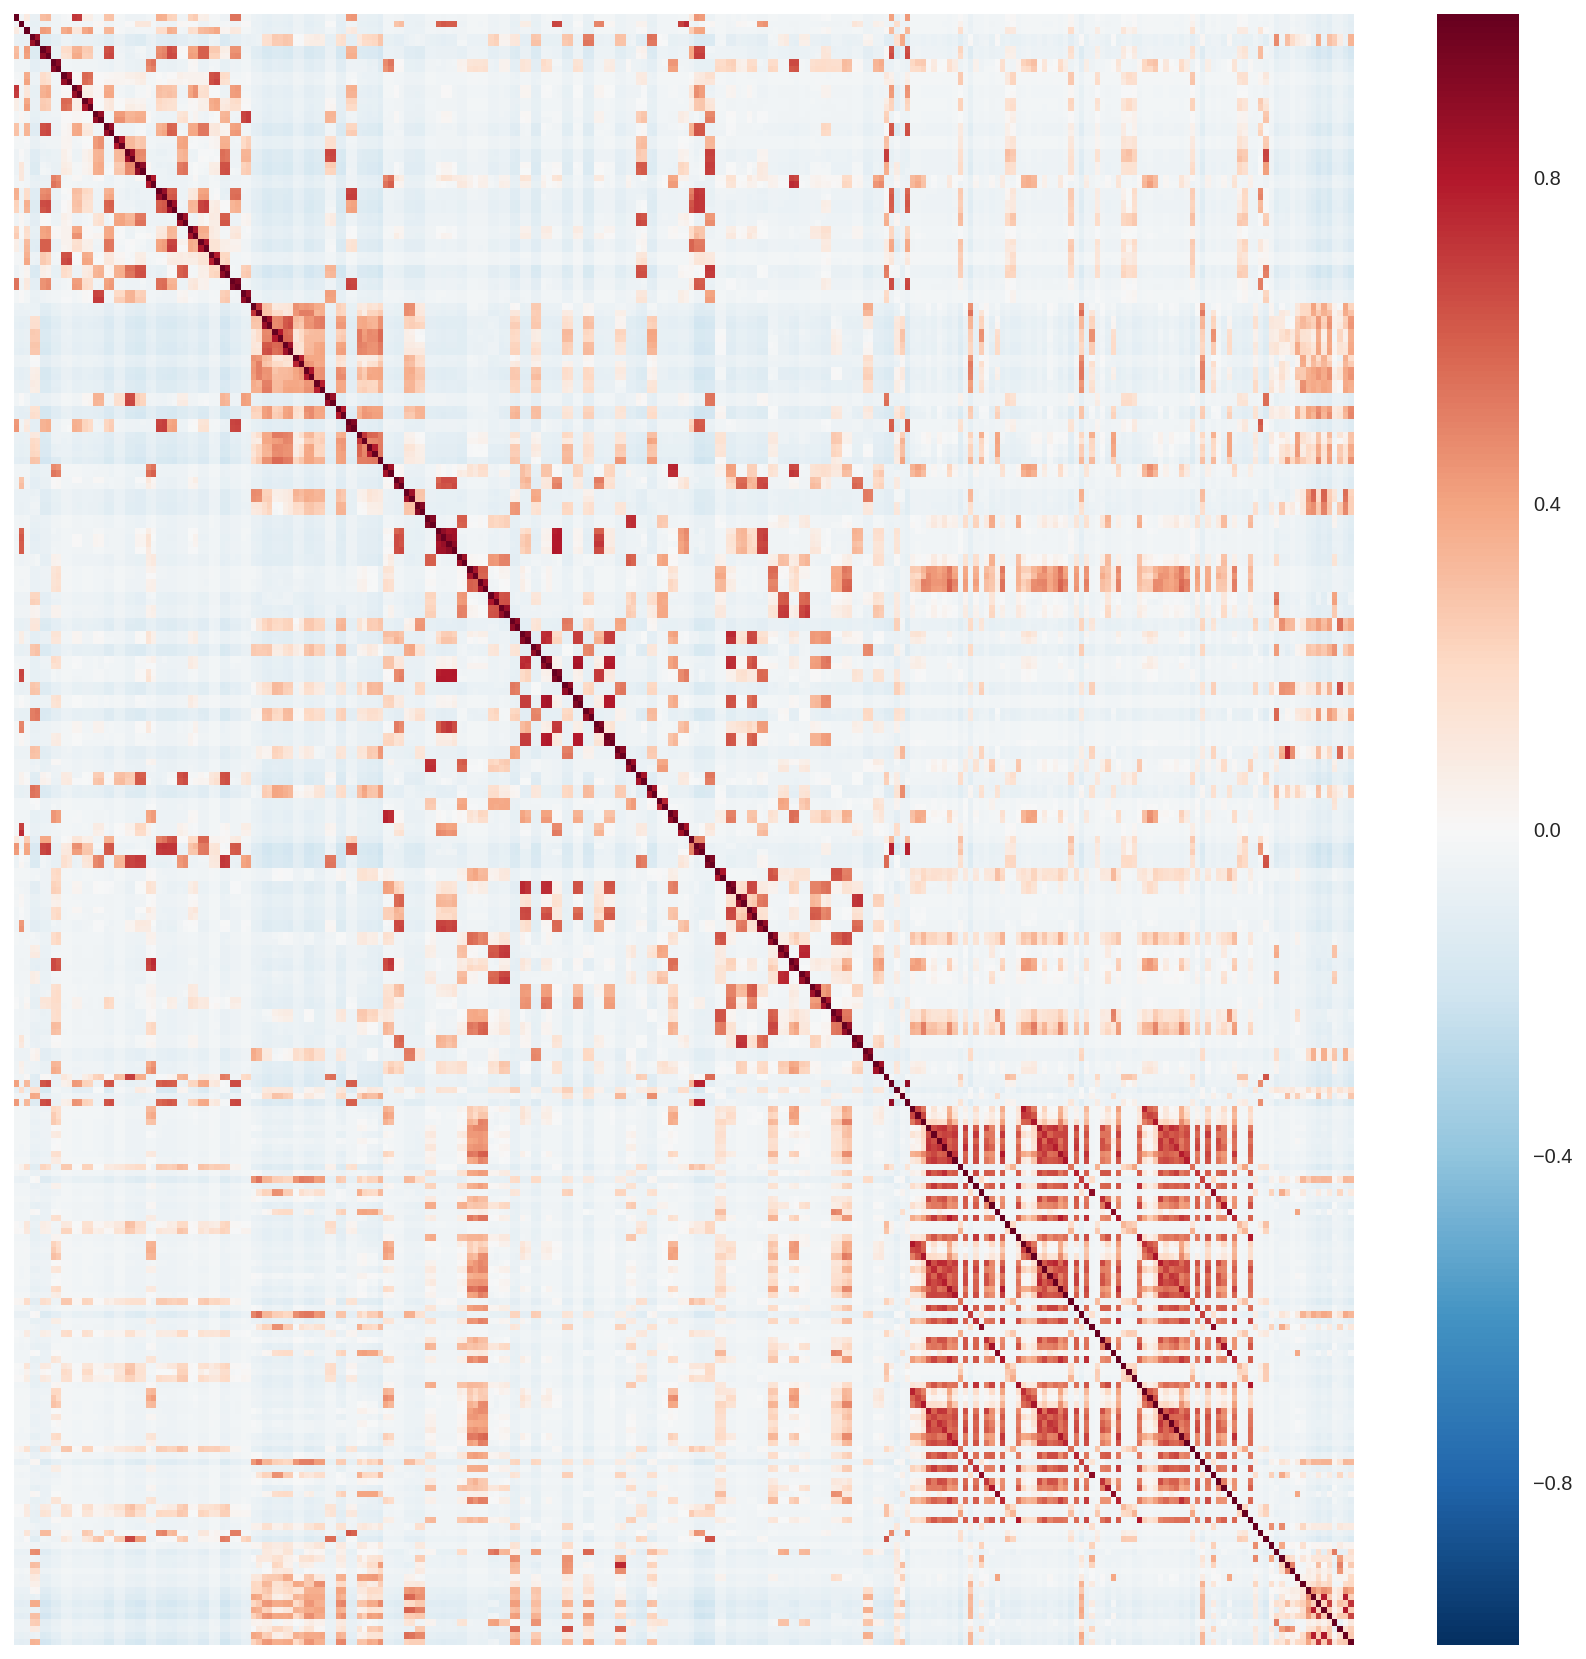

In [54]:

X_train_corr = X_rm_train.corr()

fig = plt.figure(figsize=(15,15))
sns.heatmap(X_train_corr,xticklabels=False, yticklabels=False)

Clearly, we observe clusters of predictors that are highly correlated. Let's assign a threshold of 0.8 and see how many predictor pairs have correlation above this threshold

In [55]:
corr_stack = X_train_corr.stack()
corr_thresh = 0.9

# Total entries in correlation matrix above threshold
Nthresh = (abs(corr_stack) >= corr_thresh).sum()

# Subtracting the correlation of predictor with themselves which is equal to 1
Nthresh -= 254

# Pairwise correlations appear twice in the matrix
Nthresh *= 0.5

Nthresh

16.0

In [56]:
X_train_corr.shape

(254, 254)


## Principal Component Analysis (PCA) <a id = "pca"></a>
Dimensionality reduction is one of the key techniques to reduce the complexity.

PCA is a simple dimensionality reduction technique that applies linear transformations on the original space. Among all the orthogonal linear projections, PCA minimizes the reconstruction error, which is the distance between the instance and its reconstruction from the lower-dimensional space. That is sum of the distances between points in original space and the corresponding points in lower-dimensional space.

An important point to remember about PCA is that it is an unsupervised form of dimensionality reduction. This means the response variables are not taken into consideration at any point of the transformation. sci-kit learn provides convenient methods to perform PCA which I'll be using directly.

In [57]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_rm_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension. Thus pca.explained_variance_ratio_[i] gives the variance explained solely by the i+1st dimension.

We will do pca.explained_variance_ratio_.cumsum(). That will return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions.

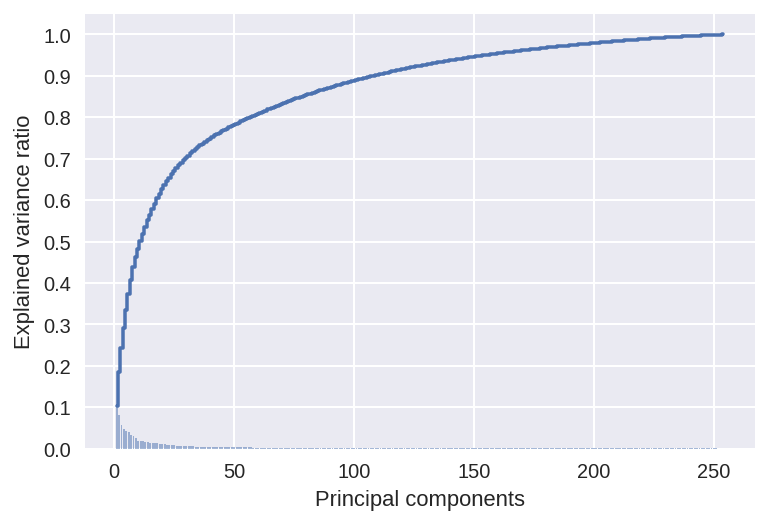

In [62]:
fig, ax = plt.subplots(1,1)

ax.bar(range(1, 255), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.step(range(1, 255), np.cumsum(pca.explained_variance_ratio_), where='mid')  
ax.set_ylabel('Explained variance ratio')
ax.set_xlabel('Principal components')
ax.set_yticks(np.arange(0,1.1,0.1))     #np.arange(start, end, step)

Roughly 95% of the variance is explained by first 150 eigen vectors. Before, we perform the dimensionality reduction on our data, let's analyze the reconstruction error as a function of the dimensions.

In [0]:
X_rm_train = np.array(X_rm_train)
mu = np.mean(X_rm_train,axis = 0)

recon_error = []
for nComp in range(1,X_rm_train.shape[1]):
    #pca.components_ is already sorted by explained variance
    Xrecon = np.dot(pca.transform(X_rm_train)[:,:nComp], pca.components_[:nComp,:])
    Xrecon += mu
    recon_error.append(sum(np.ravel(np.abs(Xrecon- X_rm_train)**2)))

Text(0,0.5,'Reconstruction Error')

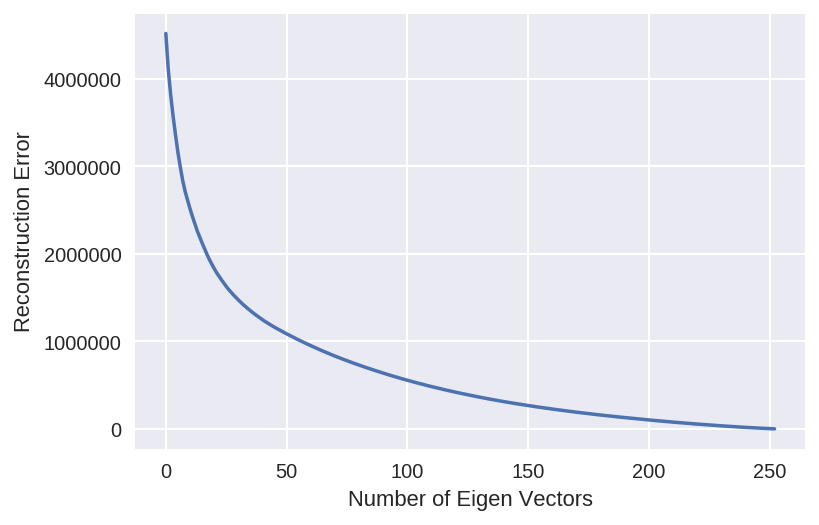

In [64]:
pd.Series(recon_error).plot()
plt.xlabel("Number of Eigen Vectors")
plt.ylabel("Reconstruction Error")

As the number of principal components used for the reconstruction increases, the reconstruction error expectedly decreases. This figure is a mirror image of the previous explained variance ratio figure.

As 95% of the explained variance is explained by top 150 components, we have reduced training and test data to 150 dimensions.

In [65]:
Ndim_reduce = 150
X_train_pca = pca.transform(X_rm_train)[:,:Ndim_reduce]
X_test_pca = pca.transform(X_rm_test)[:,:Ndim_reduce]

X_train_pca.shape,X_test_pca.shape





((19861, 150), (1111, 150))

In [0]:
import pickle

In [0]:

# First, let's save our data into a file
f = open("data_after_PCA.pckl", "wb")
pickle.dump(X_train_pca,f)
pickle.dump(y_train,f)
pickle.dump(X_test_pca,f)
pickle.dump(y_test,f)

In [69]:
from sklearn.cross_validation import train_test_split
crossval_raw_df, holdout_raw_df = train_test_split(X_raw_train, test_size = 0.1,random_state = 1)  # X_raw_train.shape, X_raw_test.shape - ((19861, 465), (1111, 465))

crossval_raw_df.shape, holdout_raw_df.shape # splitted data into training and testing

((17874, 465), (1987, 465))

In [0]:
crossval_raw_df.to_csv("X_raw_crossval.csv",na_rep = 'NaN')
holdout_raw_df.to_csv("X_raw_holdout.csv",na_rep = 'NaN')

In [71]:
# splitted data of X_train_pca.shape - (19861, 150)
crossval_pca_df, holdout_pca_df = train_test_split(X_train_pca, test_size = 0.1,random_state = 1)

crossval_pca_df.shape,holdout_pca_df.shape

((17874, 150), (1987, 150))

In [0]:
crossval_pca_df = pd.DataFrame(crossval_pca_df,index=crossval_raw_df.index)
holdout_pca_df = pd.DataFrame(holdout_pca_df,index=holdout_raw_df.index)

pd.DataFrame(crossval_pca_df).to_csv("X_pca_crossval.csv",na_rep = 'NaN')
pd.DataFrame(holdout_pca_df).to_csv("X_pca_holdout.csv",na_rep = 'NaN')

In [74]:
# y_train consist of FLOOR,	BUILDINGID, SPACEID,	RELATIVEPOSITION,	USERID,	PHONEID these columns.
# splitting the data
y_crossval, y_holdout = train_test_split(y_train, test_size = 0.1,random_state = 1)

y_crossval.shape, y_holdout.shape

((17874, 6), (1987, 6))

In [0]:
y_crossval.to_csv("y_crossval.csv",na_rep = 'NaN')
y_holdout.to_csv("y_holdout.csv",na_rep = 'NaN')

In [0]:
X_raw_test.to_csv("X_raw_test.csv", na_rep= 'NaN')
pd.DataFrame(X_test_pca).to_csv("X_pca_test.csv",na_rep = 'NaN')


In [89]:
/*
X_pca_crossval = pd.read_csv("data/X_pca_crossval.csv",index_col=0)
y_crossval = pd.read_csv("data/y_crossval.csv",index_col=0)

X_pca_holdout = pd.read_csv("data/X_pca_holdout.csv",index_col=0)
y_holdout = pd.read_csv("data/y_holdout.csv",index_col=0)

X_raw_crossval = pd.read_csv("data/X_raw_crossval.csv",index_col=0)
X_raw_holdout = pd.read_csv("data/X_raw_holdout.csv",index_col=0)

X_pca_crossval.shape,y_crossval.shape,X_pca_holdout.shape,y_holdout.shape*/

SyntaxError: ignored

In [82]:

crossval_pca_df.shape, holdout_pca_df.shape,  y_crossval.shape, y_holdout.shape

((17874, 150), (1987, 150), (17874, 6), (1987, 6))

In [0]:
X_pca_crossval = crossval_pca_df
X_pca_holdout = holdout_pca_df

In [88]:
X_pca_crossval.shape,y_crossval.shape,X_pca_holdout.shape,y_holdout.shape

((17874, 150), (17874, 6), (1987, 150), (1987, 6))